In [97]:
!pip install streamlit

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import streamlit as st

In [99]:
# 1. Carregamento e Limpeza dos Dados
# Simular um aumento do dataset (adicione mais linhas de dados reais aqui)
data = {
    'Location': ['Great Barrier Reef', 'Red Sea', 'Caribbean Sea', 'South Pacific', 'Indian Ocean']*10,
    'Date': ['2024-01-15']*50,
    'Coral_Cover_Percentage': [65.0, 70.0, 55.0, 60.0, 50.0]*10,
    'Bleaching_Index': [2, 1, 3, 2, 4]*10,
    'Species_Observed': ['Acropora, Porites, Fungia', 'Acropora, Montipora, Pocillopora', 'Agaricia, Siderastrea, Orbicella', 'Porites, Pocillopora, Montipora', 'Acropora, Pocillopora, Stylophora']*10,
    'Threatened_Species': [3, 2, 5, 1, 6]*10,
    'Water_Temperature': [27.5, 28.0, 26.0, 27.0, 29.0]*10,
    'pH_Level': [8.1, 8.2, 8.0, 8.1, 7.9]*10,
    'Nutrient_Concentration': [0.2, 0.1, 0.3, 0.15, 0.25]*10,
    'Pollution_Index': [3, 2, 4, 3, 5]*10,
    'Human_Activity_Level': ['High', 'Medium', 'High', 'Low', 'Medium']*10,
    'Conservation_Measures': ['Marine protected area, Coral gardening', 'Restricted fishing', 'Coral restoration', 'Marine protected area', 'Artificial reefs']*10
}

df = pd.DataFrame(data)

In [100]:
# Pré-processamento dos dados
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['Location', 'Human_Activity_Level']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Location', 'Human_Activity_Level']))

df = df.drop(['Location', 'Human_Activity_Level', 'Date', 'Species_Observed', 'Conservation_Measures'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Dividir os dados em treino e teste
X = df.drop('Coral_Cover_Percentage', axis=1)
y = df['Coral_Cover_Percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


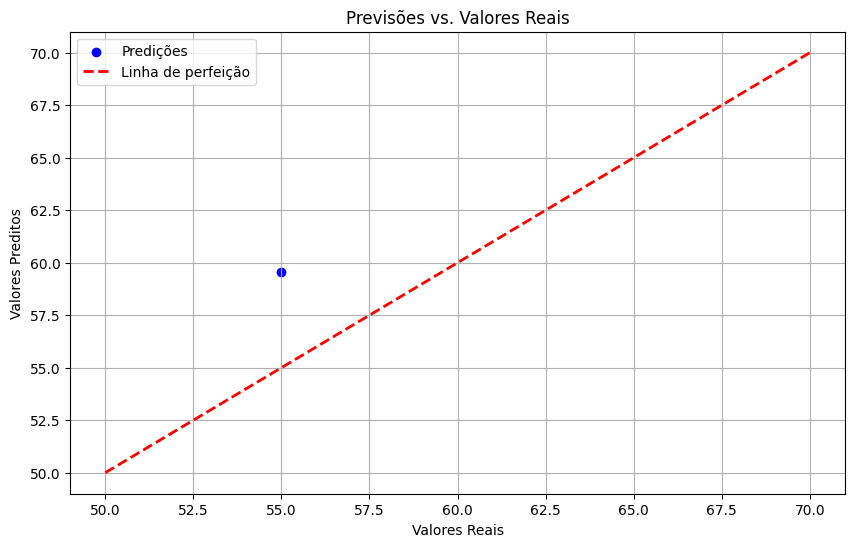

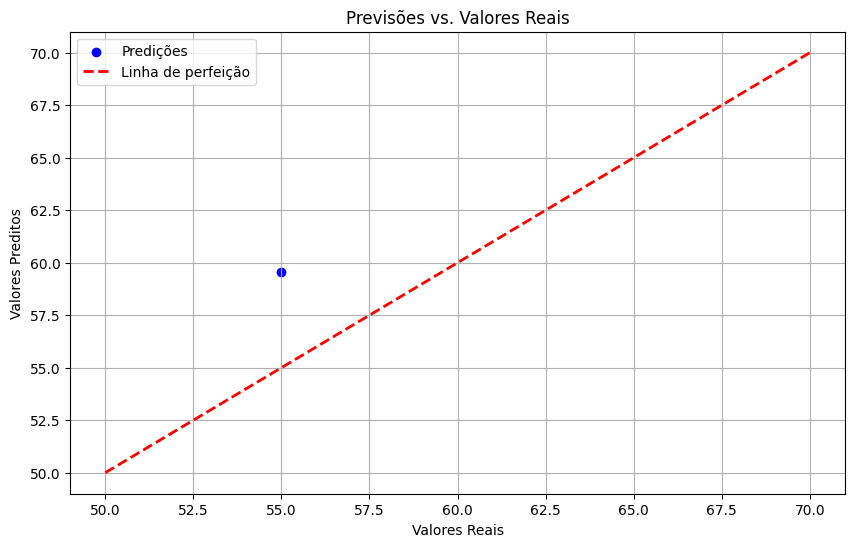

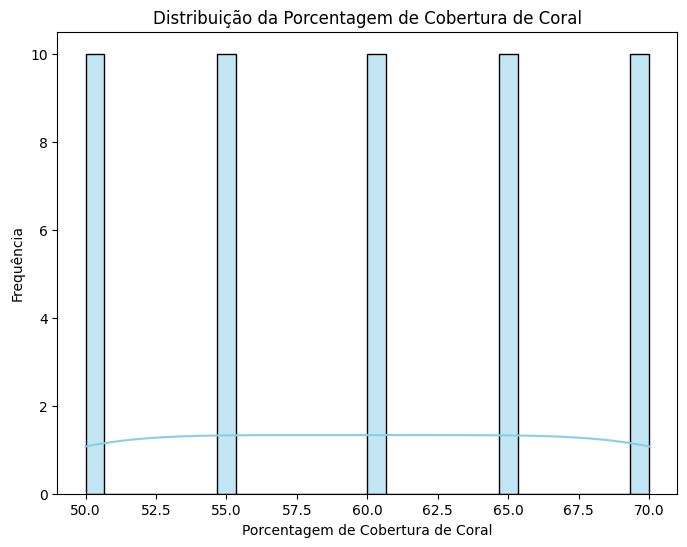

In [101]:
# 2. Análise Exploratória dos Dados (EDA)


# Análise Univariada
# Visualizar a distribuição da variável alvo 'Coral_Cover_Percentage'
plt.figure(figsize=(8, 6))
sns.histplot(df['Coral_Cover_Percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Porcentagem de Cobertura de Coral')
plt.xlabel('Porcentagem de Cobertura de Coral')
plt.ylabel('Frequência')
plt.show()

<Figure size 1200x800 with 0 Axes>

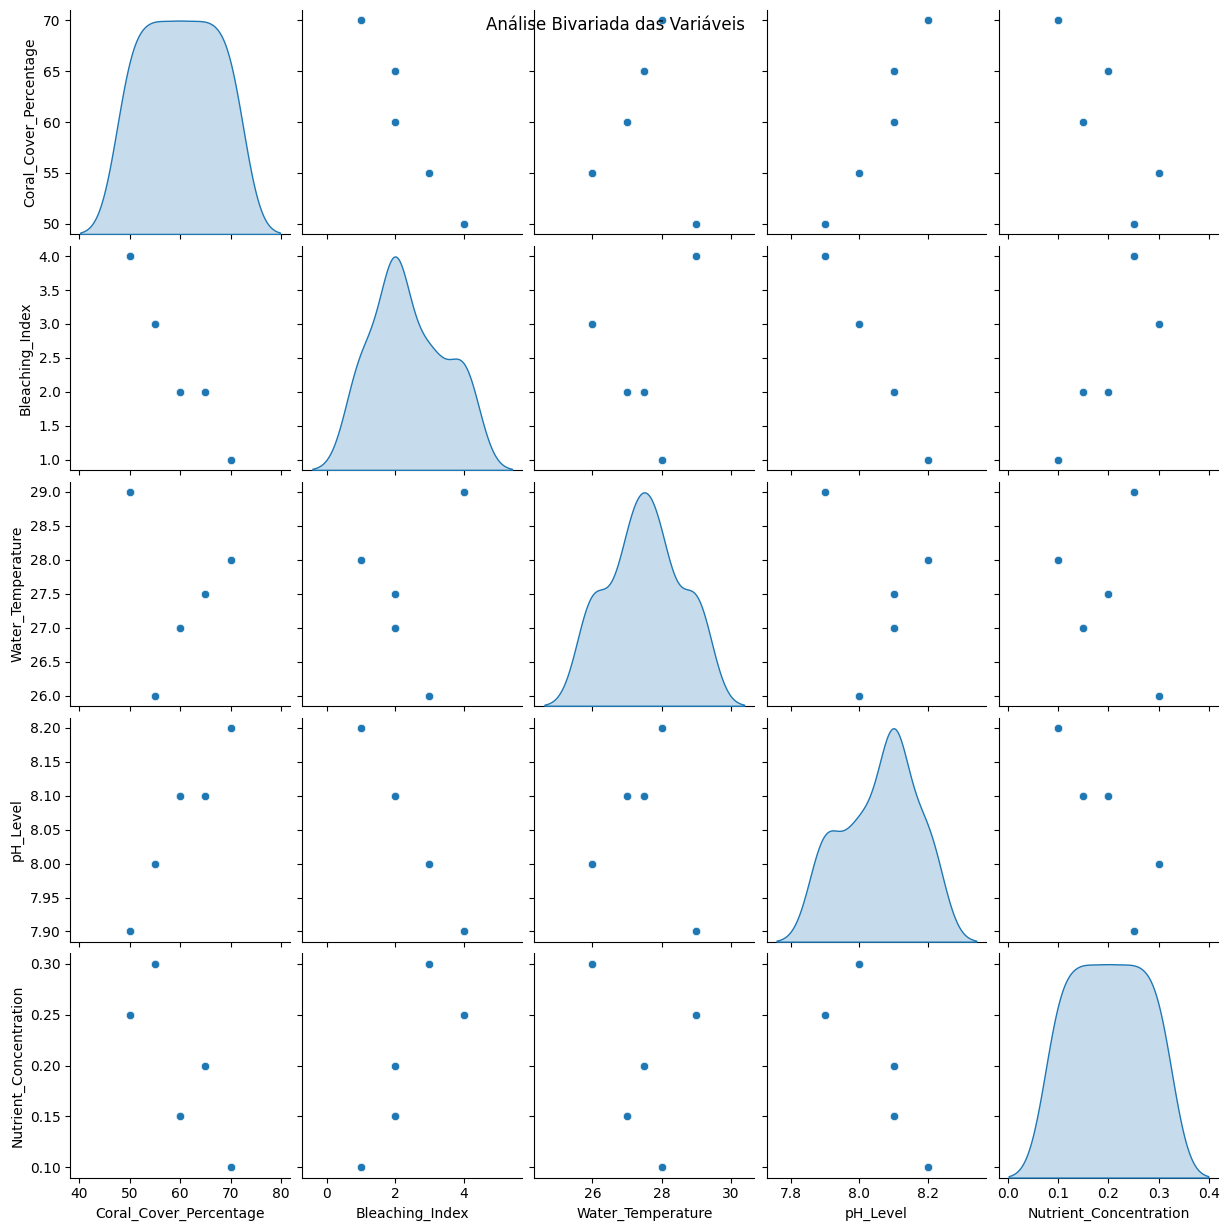

In [102]:
# Análise Bivariada
# Verificar a relação entre a porcentagem de cobertura de coral e outras variáveis
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Coral_Cover_Percentage', 'Bleaching_Index', 'Water_Temperature', 'pH_Level', 'Nutrient_Concentration']], diag_kind='kde')
plt.suptitle('Análise Bivariada das Variáveis')
plt.show()

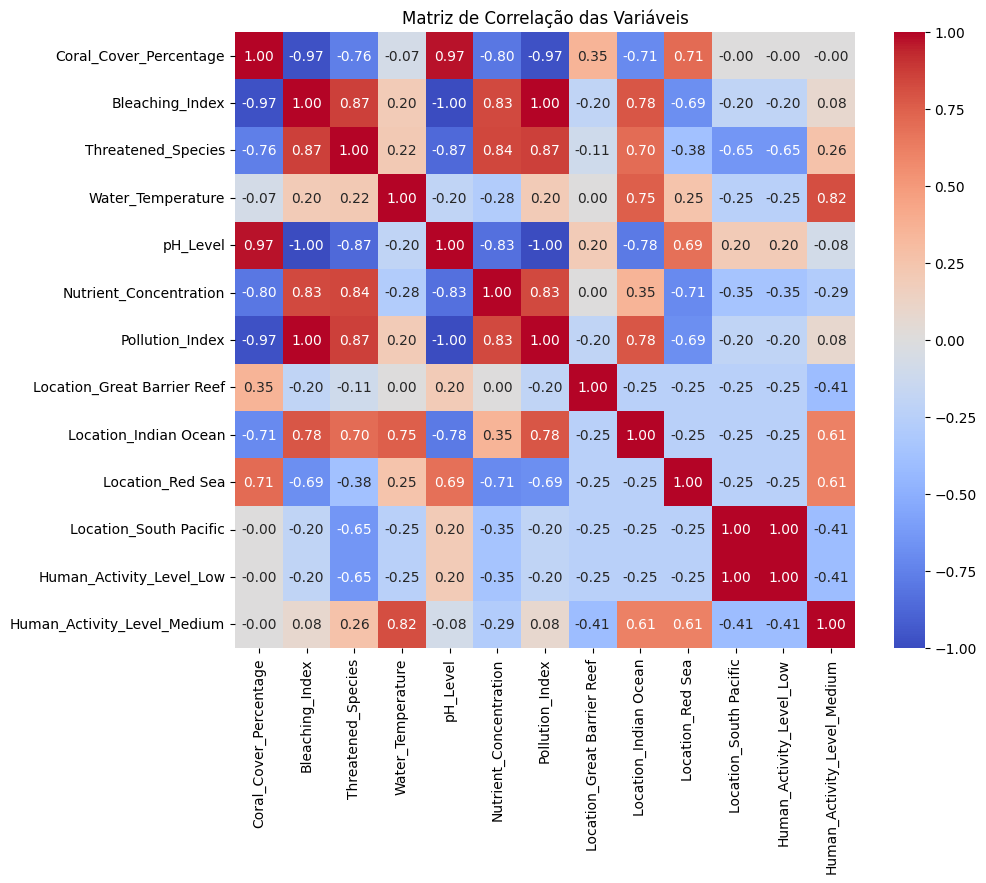

In [103]:
# Correlação entre variáveis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()


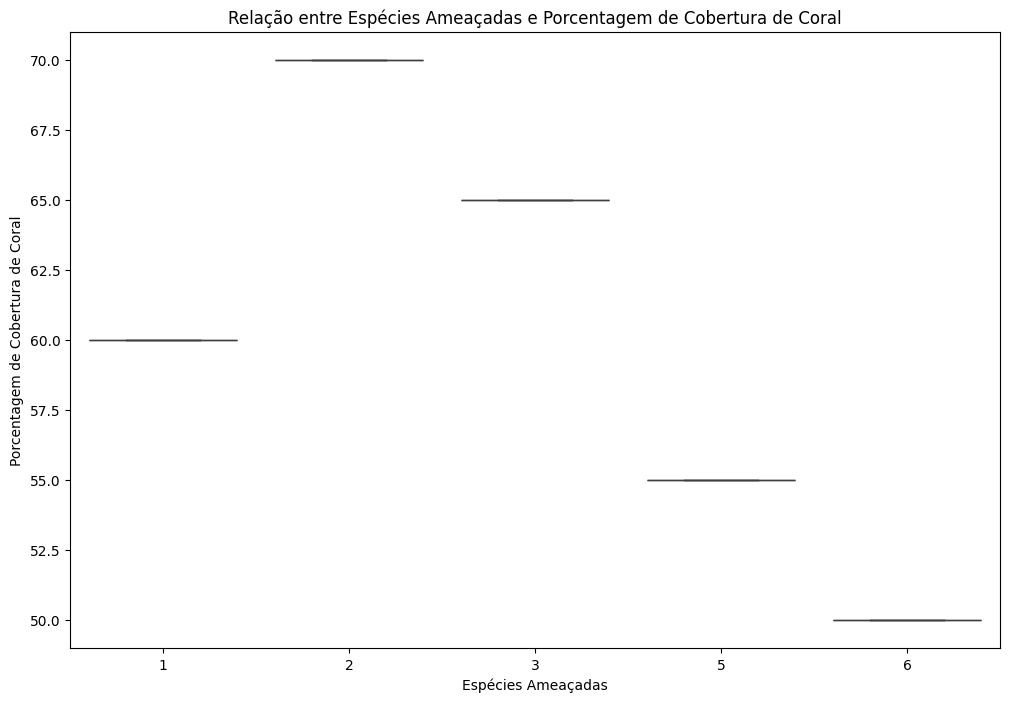

In [104]:
# Identificação de Outliers
# Visualizar boxplots para identificar outliers em algumas variáveis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Threatened_Species', y='Coral_Cover_Percentage', data=df)
plt.title('Relação entre Espécies Ameaçadas e Porcentagem de Cobertura de Coral')
plt.xlabel('Espécies Ameaçadas')
plt.ylabel('Porcentagem de Cobertura de Coral')
plt.show()


In [105]:
# 3. Modelagem (Machine Learning)
# Otimização Estruturada de Hiperparâmetros
# Ajuste de Hiperparâmetros com Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kf = KFold(n_splits=5)

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [106]:
# Melhor modelo encontrado
melhor_modelo = grid_search.best_estimator_
print(f'Melhores hiperparâmetros encontrados: {grid_search.best_params_}')

Melhores hiperparâmetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [107]:
# Avaliação do Melhor Modelo no Conjunto de Teste
y_pred = melhor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio do Melhor Modelo: {mse}')

Erro Quadrático Médio do Melhor Modelo: 0.0


In [108]:
# Validação do Modelo com Cross-Validation
# Utilizando 5 folds na validação cruzada
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  # Scores são negativos, então multiplicamos por -1 para obter o MSE

print(cv_scores)

[-2.56289062e+00 -0.00000000e+00 -3.90625000e-04 -8.59375000e-04
 -1.40625000e-03]


In [109]:
# Resultados da Validação Cruzada
print(f'Resultados da Validação Cruzada (MSE) para cada fold: {cv_mse_scores}')
print(f'Média dos MSE na Validação Cruzada: {cv_mse_scores.mean()}')
print(f'Desvio Padrão dos MSE na Validação Cruzada: {cv_mse_scores.std()}')

Resultados da Validação Cruzada (MSE) para cada fold: [2.56289062e+00 0.00000000e+00 3.90625000e-04 8.59375000e-04
 1.40625000e-03]
Média dos MSE na Validação Cruzada: 0.5131093749999994
Desvio Padrão dos MSE na Validação Cruzada: 1.024890732790649


In [110]:
# Salvar o modelo treinado e o encoder
joblib_file = "coral_model.pkl"
joblib.dump(best_model, joblib_file)
joblib.dump(encoder, "encoder.pkl")
print(f'Model and encoder saved to {joblib_file} and encoder.pkl')

Model and encoder saved to coral_model.pkl and encoder.pkl


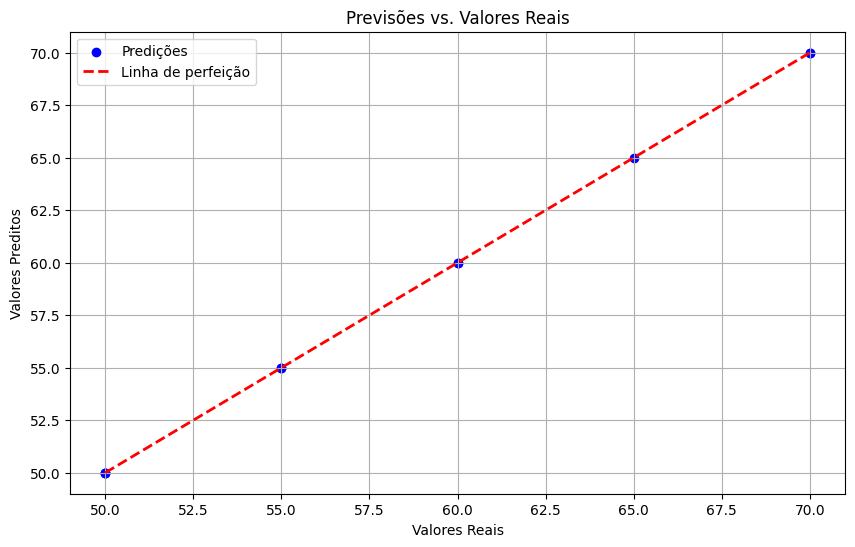

In [111]:
# Gráfico de Previsões vs. Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predições')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Linha de perfeição')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.grid(True)
plt.show()
